In [1]:
# import the usual packages
import time
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import category_encoders

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

pd.options.display.max_columns = 200
pd.options.display.width = 200

%matplotlib inline
sns.set(font_scale=1.5, palette="colorblind")

df = pd.read_csv(r'C:\Users\HP\Desktop\Oreilly\mushrooms.csv')

X = df.reindex(columns=[x for x in df.columns.values if x != 'class'])        # separate out X
X = X.apply(LabelEncoder().fit_transform)  # encode the x columns string values as integers

y = df.reindex(columns=['class'])   # separate out y
print(y['class'].value_counts())
y = np.ravel(y)                     # flatten the y array
y = LabelEncoder().fit_transform(y) # encode y column strings as integer

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10) 

e    4208
p    3916
Name: class, dtype: int64


In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="accuracy", 
                      random_state=10, 
                      periodic_checkpoint_folder="tpot_mushroom_results", 
                      n_jobs=-1, 
                      generations=2, 
                      population_size=10)
times = []
scores = []
winning_pipes = []

# run several fits 
for x in range(10):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mushroom.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Created new folder to save periodic pipeline: tpot_mushroom_results
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-39-58.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.000

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-40-55.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
32 operators have been im

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_2_idx_0_2021.12.13_08-42-12.py
32 operators have been im

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-42-48.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
32 operators have been im

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-44-05.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-45-59.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-47-42.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-49-15.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-50-59.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).

Generation 1 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Saving periodic pipeline from pareto front to tpot_mushroom_results\pipeline_gen_1_idx_0_2021.12.13_08-53-00.py
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True.
_pre_test decorator: _random_mutation_operator: num_test=0 '(slice(None, None, None), 0)' is an invalid key.

Generation 2 - Current Pareto front scores:

-1	1.0	MLPClassifier(input_matrix, MLPClassifier__alpha=0.0001, MLPClassifier__learning_rate_init=0.01)
Periodic pipeline was not

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (8124, 23)
    Training Set Memory Usage = 1.43 MB
Single_Label Target: ['class']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           e:    4208  ->   51.8%
           p:    3916  ->   48.2%
String or Multi Class target: class transformed as follows: {'e': 0, 'p': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    22 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
        ['veil-type']
Number of Processors on this device = 1
CPU available
    No GPU active on this device
#############     D A T A    P R E P A R A T I O N   AND C L E A N I N G     #############
No Missing Values in train data

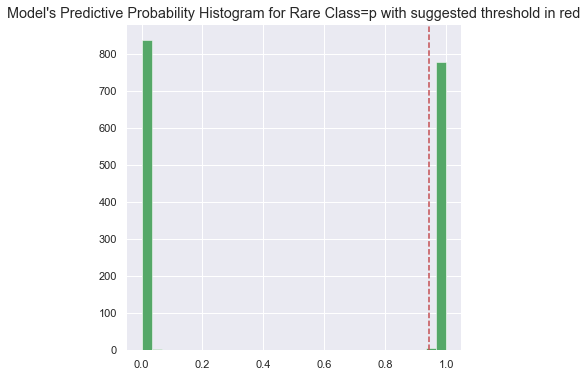

    Using threshold=0.5. However, 0.944 provides better F1=1.00 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 99.9%
Balanced Accuracy = 100.00% with Threshold = 0.50
Confusion Matrix:
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Balanced Accuracy = 100.00% with Threshold = 0.94
Confusion Matrix:
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 62
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 2 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.96530418 1.03728294]
    class_weighted_rows = {0: 4208, 1: 4061}
Training model now on resampled train data: (8269, 19). This will take time...
    Resampled data Training time taken = 13 seconds
##################  Completed Imbalanced Tra

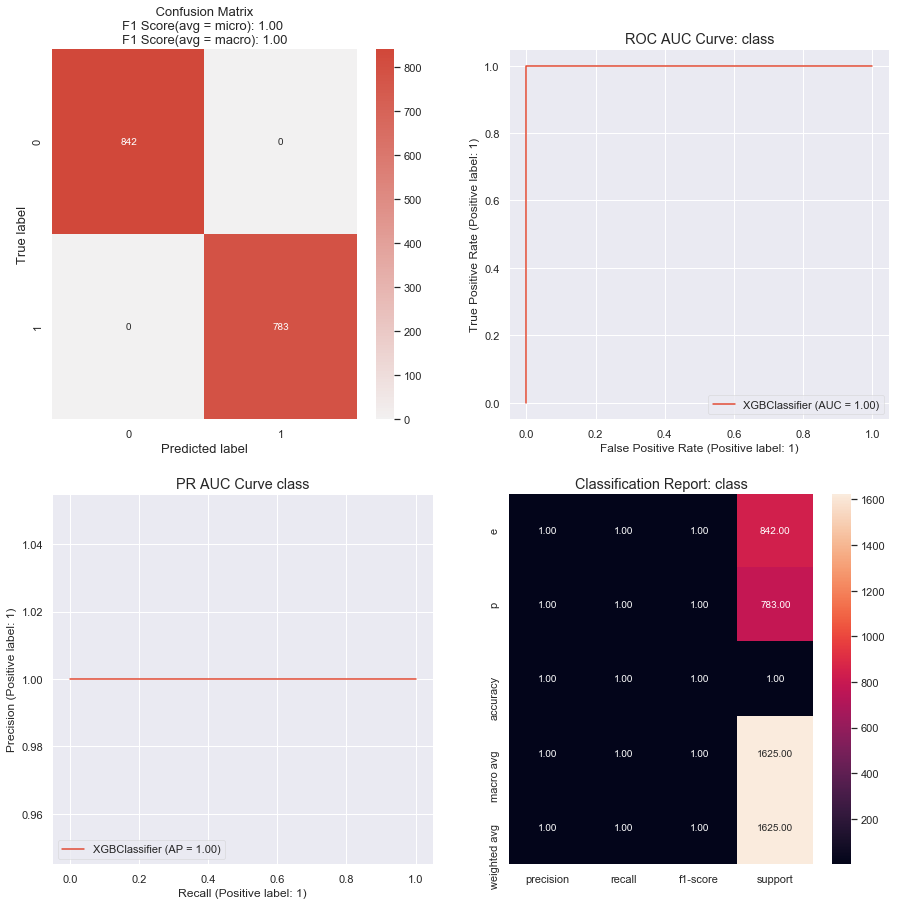

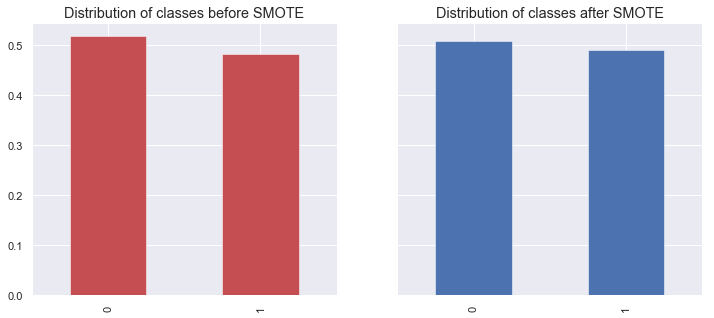

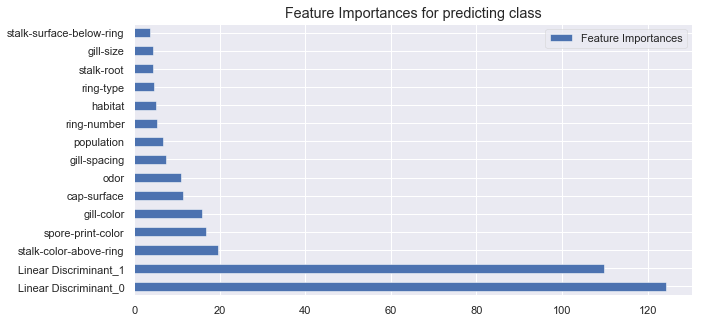

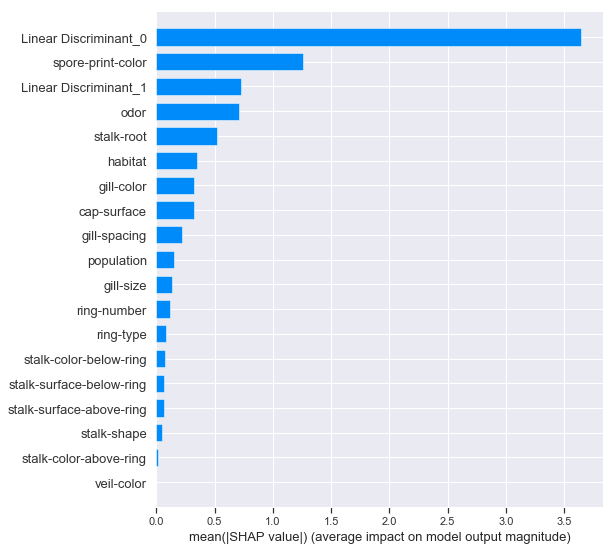

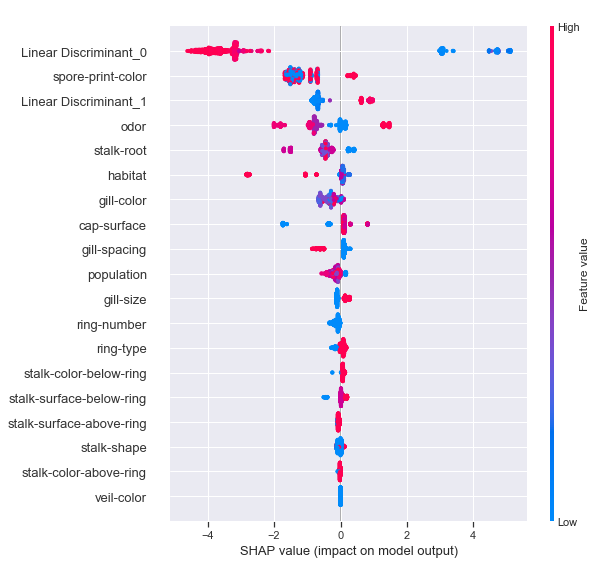

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 89
Writing Output files to disk...
    Saving predictions to .\class\class_Binary_Classification_test_modified.csv
    Saving predictions to .\class\class_Binary_Classification_submission.csv
    Saving predictions to .\class\class_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.5 for the Entire Process


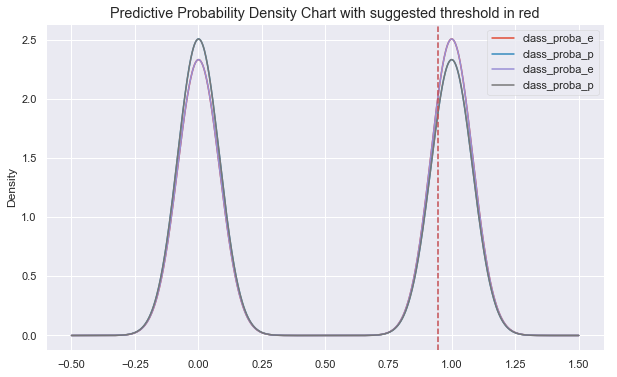

In [6]:
from autoviml.Auto_ViML import Auto_ViML

model, features, trainm, testm = Auto_ViML(
    train=df,
    target="class",
    test="",
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)